<a href="https://colab.research.google.com/github/MohamadRayi/MachineLearningTasks/blob/main/UAS%20Machine%20Learning/Mohamad_Rayi_Dwi_Putra_MNIST_ANGKA_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mengisntall TensorFlow dan Mengimport library yang dibutuhkan**

In [13]:
# Memastikan TensorFlow sudah diinstall
!pip install tensorflow

# Mengimport library yang dibutuhkan
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np



**Memuat dataset MNIST dan menampilkan beberapa gambar**

11490434/11490434 [==============================] - 0s 0us/step


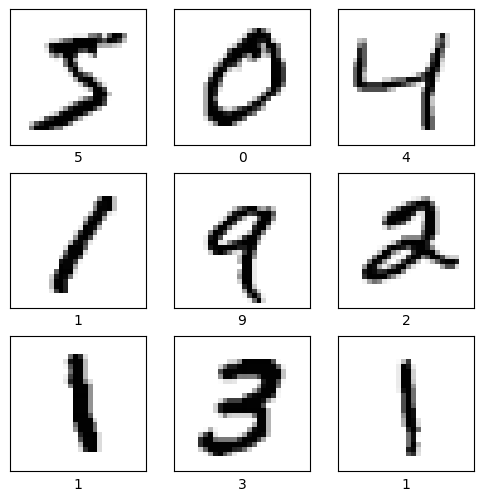

In [3]:
# Memuat dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Menampilkan beberapa gambar dari dataset MNIST
num_rows = 3
num_cols = 3
plt.figure(figsize=(2 * num_cols, 2 * num_rows))
for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(f"{y_train[i]}")
plt.show()


**Normalisasi gambar dan mengubah label menjadi one-hot encoding**

In [4]:
# Normalisasi gambar (nilai piksel 0-255 menjadi 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Mengubah label menjadi one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


**Membangun model Sequential**

In [5]:
# Membangun model Sequential
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Mengubah gambar 2D menjadi 1D
    Dense(128, activation='relu'),  # Lapisan tersembunyi dengan 128 neuron
    Dense(64, activation='relu'),   # Lapisan tersembunyi dengan 64 neuron
    Dense(10, activation='softmax') # Lapisan output dengan 10 neuron (klasifikasi 10 kelas)
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


**Kompilasi dan pelatihan model**

In [6]:
# Melatih model dengan data training
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                    batch_size=32)


Epoch 1/10
1875/1875 [==============================] - 23s 11ms/step - loss: 0.2455 - accuracy: 0.9280 - val_loss: 0.1332 - val_accuracy: 0.9586
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1013 - accuracy: 0.9690 - val_loss: 0.0943 - val_accuracy: 0.9724
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0718 - accuracy: 0.9779 - val_loss: 0.1102 - val_accuracy: 0.9670
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0545 - accuracy: 0.9829 - val_loss: 0.0900 - val_accuracy: 0.9724
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0417 - accuracy: 0.9864 - val_loss: 0.0998 - val_accuracy: 0.9725
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0360 - accuracy: 0.9880 - val_loss: 0.0864 - val_accuracy: 0.9768
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0297 - accuracy: 0.9904 - val_loss: 0.0803 - val_ac

**Evaluasi model**

In [7]:
# Evaluasi model dengan data test
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')


313/313 - 1s - loss: 0.1086 - accuracy: 0.9745 - 506ms/epoch - 2ms/step

Test accuracy: 0.9745


**Plot akurasi dan loss selama training dan validasi**

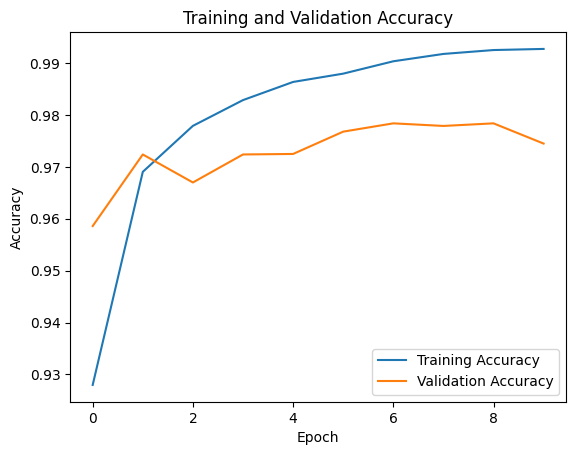

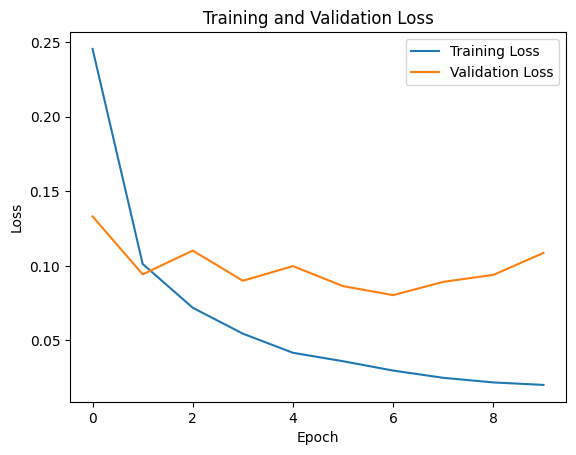

In [8]:
# Plot akurasi training dan validasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Plot loss training dan validasi
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


**Fungsi untuk menampilkan gambar dan prediksi**

1/1 [==============================] - 0s 25ms/step


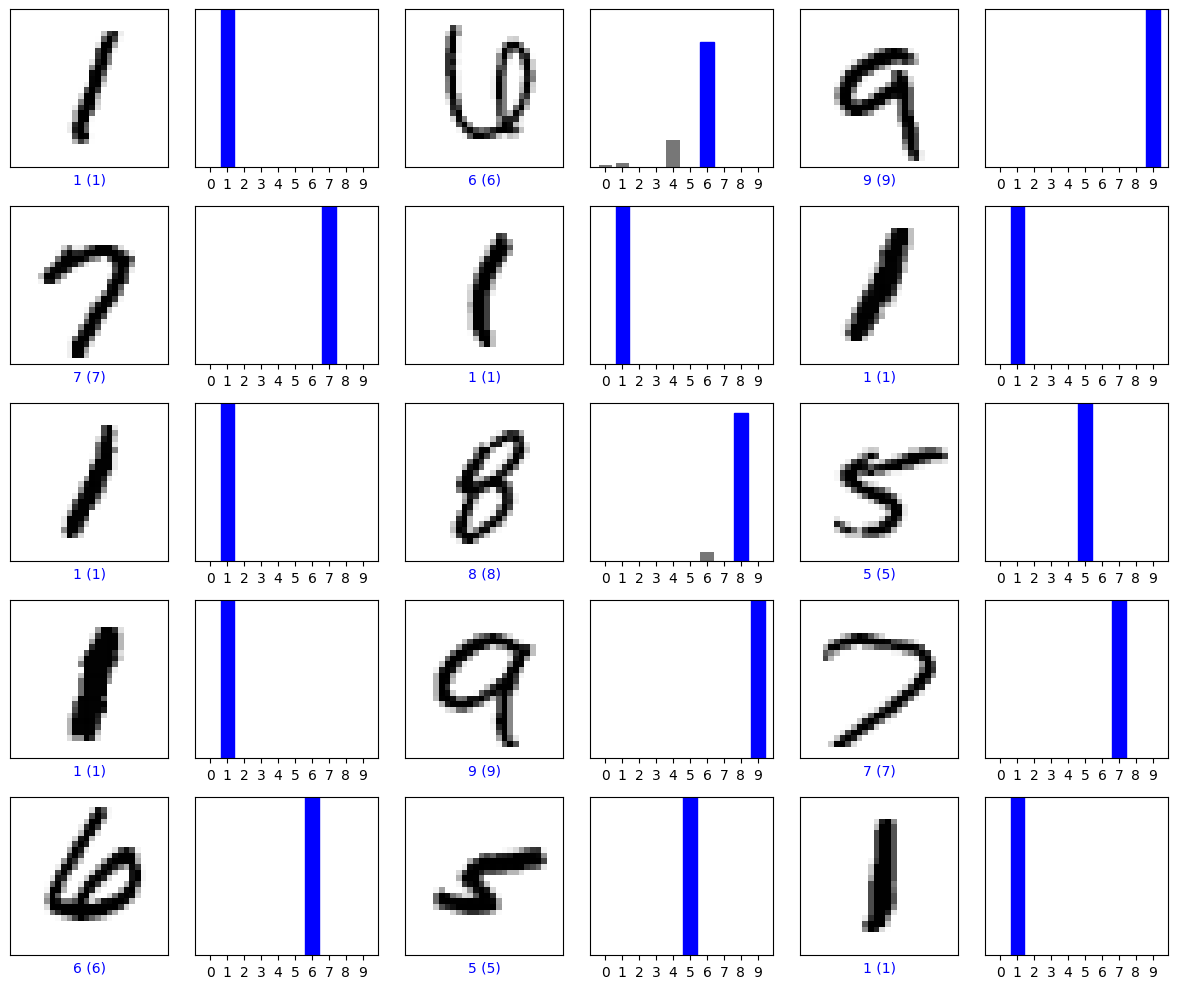

In [15]:
# Fungsi untuk menampilkan gambar dan prediksi
def plot_image(predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{predicted_label} ({true_label})", color=color)

def plot_value_array(predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Melakukan prediksi pada beberapa gambar dari data test
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    idx = np.random.randint(0, x_test.shape[0])
    img = x_test[idx]
    true_label = np.argmax(y_test[idx])
    img_reshaped = (np.expand_dims(img, 0))
    predictions = model.predict(img_reshaped)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(predictions[0], true_label, img)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(predictions[0], true_label)
plt.tight_layout()
plt.show()
